In [1]:
import os
import sys
import json
import random
import pandas as pd
import numpy as np
import scipy.stats as stats
from datetime import datetime
from PIL import Image
import cv2
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor, Normalize, Lambda, Compose

np.random.seed(44)
torch.manual_seed(44)

np.set_printoptions(precision=3)
pd.set_option('display.max_rows', None)

import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = [20, 16]

import plotly.graph_objects as go
import plotly.io as pio   
import plotly.express as px
from plotly.subplots import make_subplots

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
display(HTML("<style>div.output_scroll { height: 100em; }</style>"))
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 200)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

import re
re_num = re.compile(r'([0-9\.]+)(.*)')

#import env
os.getcwd()

C:\Users\RJH\AppData\Local\Temp\ipykernel_2924\1927132979.py:33: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


'D:\\Work\\01_C51'

In [2]:
df = pd.read_csv('data_220926.csv', index_col=0)
df

,materials,equipments,sample_num,layer_num,laser_power(w),scan_speed(mm/sec),density(g/cm^3),yield_stress(MPa),tensile_stress(MPa),elongation(%),lamination_direction,trial_no,laser_density
0,sus,Vulcan 500,433.0,274,240.0,1540.0,7.64,449.14,633.20,25.0,0.0,1.0,0.155844
1,sus,Vulcan 500,434.0,274,264.0,1540.0,7.74,450.59,635.25,28.8,0.0,1.0,0.171429
2,sus,Vulcan 500,435.0,274,312.0,1540.0,7.72,448.42,632.19,38.5,0.0,1.0,0.202597
3,sus,Vulcan 500,436.0,274,360.0,1540.0,7.80,453.55,639.41,38.5,0.0,1.0,0.233766
4,sus,Vulcan 500,437.0,274,240.0,1320.0,7.74,473.84,629.69,36.9,0.0,1.0,0.181818
5,sus,Vulcan 500,438.0,274,264.0,1320.0,7.84,462.77,619.52,36.5,0.0,1.0,0.200000
6,sus,Vulcan 500,439.0,274,312.0,1320.0,7.84,470.60,634.58,36.5,0.0,1.0,0.236364
7,sus,Vulcan 500,440.0,274,360.0,1320.0,7.85,469.92,641.53,38.5,0.0,1.0,0.272727
8,sus,Vulcan 500,441.0,274,240.0,1100.0,7.86,465.46,644.75,38.5,0.0,1.0,0.218182
9,sus,Vulcan 500,442.0,274,264.0,1100.0,7.85,456.62,636.67,38.5,0.0,1.0,0.240000


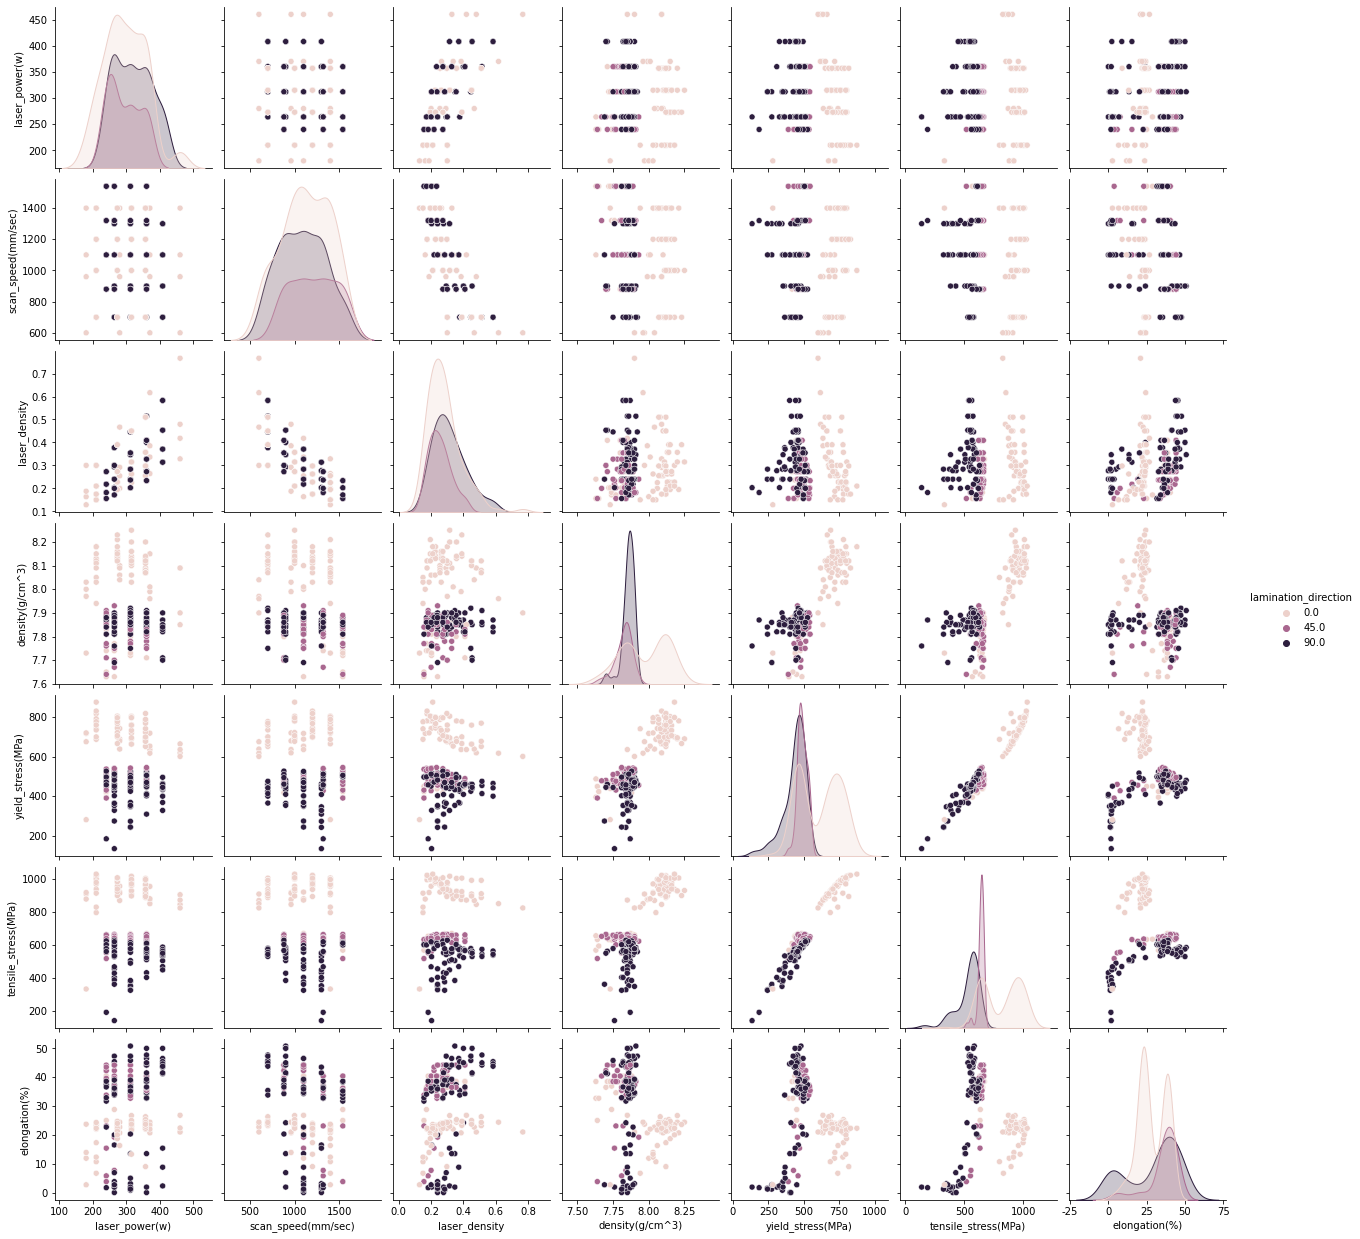

In [3]:
sns.pairplot(df, x_vars=['laser_power(w)','scan_speed(mm/sec)','laser_density', 'density(g/cm^3)','yield_stress(MPa)','tensile_stress(MPa)','elongation(%)'],
             y_vars=['laser_power(w)','scan_speed(mm/sec)','laser_density', 'density(g/cm^3)','yield_stress(MPa)','tensile_stress(MPa)','elongation(%)'],
             hue='lamination_direction')

In [4]:
cols = ['laser_power(w)','scan_speed(mm/sec)','lamination_direction','laser_density','density(g/cm^3)','yield_stress(MPa)','tensile_stress(MPa)','elongation(%)']
corr = df[cols].corr(method='pearson')
corr

,laser_power(w),scan_speed(mm/sec),lamination_direction,laser_density,density(g/cm^3),yield_stress(MPa),tensile_stress(MPa),elongation(%)
laser_power(w),1.000000,-0.080969,0.171664,0.631738,-0.033212,-0.104910,-0.074841,0.161968
scan_speed(mm/sec),-0.080969,1.000000,-0.055498,-0.776263,-0.200836,-0.078190,-0.113236,-0.149905
lamination_direction,0.171664,-0.055498,1.000000,0.130742,-0.407617,-0.585002,-0.706335,0.042828
laser_density,0.631738,-0.776263,0.130742,1.000000,0.104284,-0.003898,0.039099,0.210638
density(g/cm^3),-0.033212,-0.200836,-0.407617,0.104284,1.000000,0.827598,0.795436,-0.308722
yield_stress(MPa),-0.104910,-0.078190,-0.585002,-0.003898,0.827598,1.000000,0.968636,-0.122743
tensile_stress(MPa),-0.074841,-0.113236,-0.706335,0.039099,0.795436,0.968636,1.000000,-0.049426
elongation(%),0.161968,-0.149905,0.042828,0.210638,-0.308722,-0.122743,-0.049426,1.000000


In [5]:
_df = df.copy()
display(len(_df))
_df.replace({'sus':0,'inconel':1}, inplace=True)
_df.head()

240

,materials,equipments,sample_num,layer_num,laser_power(w),scan_speed(mm/sec),density(g/cm^3),yield_stress(MPa),tensile_stress(MPa),elongation(%),lamination_direction,trial_no,laser_density
0,0,Vulcan 500,433.0,274,240.0,1540.0,7.64,449.14,633.20,25.0,0.0,1.0,0.155844
1,0,Vulcan 500,434.0,274,264.0,1540.0,7.74,450.59,635.25,28.8,0.0,1.0,0.171429
2,0,Vulcan 500,435.0,274,312.0,1540.0,7.72,448.42,632.19,38.5,0.0,1.0,0.202597
3,0,Vulcan 500,436.0,274,360.0,1540.0,7.80,453.55,639.41,38.5,0.0,1.0,0.233766
4,0,Vulcan 500,437.0,274,240.0,1320.0,7.74,473.84,629.69,36.9,0.0,1.0,0.181818


In [6]:
prop_cols = ['yield_stress(MPa)', 'tensile_stress(MPa)', 'elongation(%)', 'density(g/cm^3)', ]
cond_cols = ['lamination_direction', 'laser_power(w)', 'scan_speed(mm/sec)', 'laser_density', 'materials']

In [7]:
from sklearn.model_selection import train_test_split

# is_train = np.array([i for i in range(len(_df))])
# np.random.shuffle(is_train)

df_train, df_test = train_test_split(_df, test_size=0.1, shuffle=True, random_state=34)

In [8]:
df_train.head()

,materials,equipments,sample_num,layer_num,laser_power(w),scan_speed(mm/sec),density(g/cm^3),yield_stress(MPa),tensile_stress(MPa),elongation(%),lamination_direction,trial_no,laser_density
184,1,Vulcan 500,286.0,324,315.0,1400.0,8.16,757.09,978.55,23.0,0.0,2.0,0.225000
199,1,Vulcan 500,286.0,324,357.0,700.0,8.07,768.78,993.57,24.3,0.0,3.0,0.510000
75,0,Vulcan 500,508.0,1995,360.0,1320.0,7.80,458.92,663.32,40.4,45.0,2.0,0.272727
52,0,Vulcan 500,485.0,1995,240.0,1100.0,7.76,469.68,632.86,15.4,45.0,1.0,0.218182
47,0,Vulcan 500,480.0,274,360.0,880.0,7.90,452.46,660.79,38.5,0.0,3.0,0.409091


In [9]:
df_train.shape[0]

216

In [10]:
df_train, df_val = train_test_split(df_train, test_size=0.1, shuffle=True, random_state=34)

In [11]:
df_val.head()

,materials,equipments,sample_num,layer_num,laser_power(w),scan_speed(mm/sec),density(g/cm^3),yield_stress(MPa),tensile_stress(MPa),elongation(%),lamination_direction,trial_no,laser_density
132,1,Vulcan 300,88.0,324,180.0,600.0,7.97,674.99,910.18,23.7,0.0,1.0,0.300000
121,0,Vulcan 300,403.0,2549,408.0,700.0,7.84,441.96,542.65,43.8,90.0,3.0,0.582857
182,1,Vulcan 500,277.0,324,315.0,700.0,8.12,662.78,898.27,25.0,0.0,2.0,0.450000
142,1,Vulcan 300,88.0,324,180.0,960.0,8.03,719.52,919.34,13.9,0.0,1.0,0.187500
124,0,Vulcan 300,403.0,2549,360.0,900.0,7.84,409.18,522.66,24.2,90.0,3.0,0.400000


In [12]:
df_val.shape[0]

22

In [13]:
df_test.head()

,materials,equipments,sample_num,layer_num,laser_power(w),scan_speed(mm/sec),density(g/cm^3),yield_stress(MPa),tensile_stress(MPa),elongation(%),lamination_direction,trial_no,laser_density
79,0,Vulcan 500,512.0,1995,360.0,1540.0,7.85,506.13,664.38,40.4,45.0,2.0,0.233766
10,0,Vulcan 500,443.0,274,312.0,1100.0,7.88,471.35,658.91,38.5,0.0,1.0,0.283636
69,0,Vulcan 500,502.0,1995,264.0,1100.0,7.75,483.22,658.94,44.2,45.0,2.0,0.240000
14,0,Vulcan 500,447.0,274,312.0,880.0,7.80,447.67,633.87,38.5,0.0,1.0,0.354545
53,0,Vulcan 500,486.0,1995,264.0,1100.0,7.93,455.50,622.69,19.2,45.0,1.0,0.240000


In [14]:
df_test.shape[0]

24

In [19]:
def sample_to_sub_dir(sample : pd.Series, ):
    sample_num = sample['sample_num']
#     material = sample['materials'].lower()
    material = sample['materials']
    lam_dir = int(sample['lamination_direction'])
    trial_no = int(sample['trial_no'])
    
    return f'{sample_num}_5_{material}_{lam_dir}_{trial_no}cycle'

class SetDataset(Dataset):
    
    def __init__(self, df, transform_x=None, transform_y=None):
        self.df = df
        self.transform_x = transform_x
        self.transform_y = transform_y
        
    def __getitem__(self, idx):
        
        sample = self.df.iloc[idx, :]
        sample_num = sample['sample_num']
        
        x = sample[cond_cols].values
        y = sample[prop_cols].values
#         print(x)
        sub_dir = sample_to_sub_dir(sample)  
        
        if self.transform_x is not None:
            x = np.array(self.transform_x(x), dtype=np.float32)
#             x = np.append(x, np.array(sample[['materials']].values))
        if self.transform_y is not None:
            y = np.array(self.transform_y(y), dtype=np.float32)
#         print(x)
        return (x, y, sample_num, idx)
    
    def __len__(self):
        return len(self.df)

In [20]:
class Standardizer:
    """
    정규화
    """ 
    def __init__(self, means=np.zeros(0), stds=np.ones(0)):
        self.means = means
        self.stds = stds
        
    def fit(self, array):
        self.means = array.mean(axis=0)
        self.stds = array.std(axis=0)
        
        self.stds[self.stds == 0] = 1
        
        return self
        
    def __call__(self, sample):
        return (sample - self.means) / self.stds
    
    def inverse_tranform(self, normalized):
        return normalized * self.stds[None, :] + self.means[None, :]

In [21]:
normalizer_x = Standardizer().fit(df_train[cond_cols].values)
normalizer_y = Standardizer().fit(df_train[prop_cols].values)

transform_x = Compose([normalizer_x])
transform_y = Compose([normalizer_y])
print(normalizer_x.means)
print(normalizer_x.stds)
print(transform_x(1))

[3.966e+01 3.035e+02 1.130e+03 2.859e-01 2.680e-01]
[4.013e+01 5.838e+01 2.574e+02 9.922e-02 4.429e-01]
[-0.964 -5.182 -4.386  7.197  1.653]


In [22]:
print(transform_x(2))

[-0.939 -5.165 -4.382 17.276  3.91 ]


In [23]:
train_dataset = SetDataset(df_train, transform_x=transform_x, transform_y=transform_y)
test_dataset = SetDataset(df_test, transform_x=transform_x, transform_y=transform_y)
val_dataset = SetDataset(df_val, transform_x=transform_x, transform_y=transform_y)

In [24]:
train_dataset[0]

(array([ 1.254, -0.677,  1.592, -1.154, -0.605], dtype=float32),
 array([-0.206, -0.411,  0.399, -0.188], dtype=float32),
 669.0,
 0)

In [44]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pytorch_lightning as pl
from pytorch_lightning import LightningModule
# from resnet import ResNet, BasicBlock
from munch import Munch

#torch.backends.cudnn.enabled=False

class DataModule(pl.LightningDataModule):
    def __init__(self, params, train_dataset, test_dataset, val_dataset=None):
        super().__init__()

        self.train = train_dataset
        self.val = val_dataset
        self.test = test_dataset
        
    def train_dataloader(self, shuffle=True, drop_last=True):
        train_loader = DataLoader(dataset=self.train, 
                                  batch_size=params.batch_size, 
                                  num_workers=params.num_workers,
                                  shuffle=shuffle,
                                  drop_last=drop_last)
        return train_loader
            
    def val_dataloader(self, shuffle=False, drop_last=True):
        if self.val:
            val_loader = DataLoader(dataset=self.val, 
                                    batch_size=params.batch_size, 
                                    num_workers=params.num_workers,
                                    shuffle=shuffle,
                                    drop_last=drop_last)
            return val_loader
        else:
            return None
            
    def test_dataloader(self, shuffle=False, drop_last=True):
        test_loader = DataLoader(dataset=self.test, 
                        batch_size=params.batch_size, #self.test.__len__(), 
                        num_workers=params.num_workers,
                        shuffle=shuffle,
                        drop_last=drop_last)
        return test_loader

# def create_model():
#     return ResNet(BasicBlock, [1,1,1,1], num_classes=1)
# #return _resnet("resnet", BasicBlock, [1,1,1,1], pretrained=False, progress=False, num_classes=1)

class RegressionModule(LightningModule):
    def __init__(self, params):
        super().__init__()
        self.learning_rate = params.learning_rate
        self.weight_decay = params.weight_decay
        self.output_size = params.output_size
        self.input_size = params.input_size
        self.hidden_size = params.hidden_size
        self.num_layers = params.num_layers
        
#         #self.img_encoder = create_model()
#         self.img_encoder = ResNet(BasicBlock, [1,1,1,1], num_classes=256)
#         #self.model = _resnet("resnet", BasicBlock, [1,1,1,1], pretrained=False, progress=False, num_classes=1)
        
        inp_encoder = [
            nn.Linear(self.input_size, 16), nn.ReLU(), nn.Dropout(params.dropout), 
        ]
        self.inp_encoder = nn.Sequential( *inp_encoder )
        layers = [
            nn.Linear(16, 32), nn.ReLU(), nn.Dropout(params.dropout), 
            nn.Linear(32, 128), nn.ReLU(), nn.Dropout(params.dropout), 
            nn.Linear(128, 256), nn.ReLU(), nn.Dropout(params.dropout), 
            nn.Linear(256, 128), nn.ReLU(), nn.Dropout(params.dropout), 
            nn.Linear(128, 32), nn.ReLU(), nn.Dropout(params.dropout), 
            nn.Linear(32, self.output_size),
        ]
        self.layers = nn.Sequential( *layers )
      
    
    def forward(self, x_inp, ): #[B,L,I]
        
#         out_img = self.img_encoder(x_img)
        out_inp = self.inp_encoder(x_inp)
#         out = torch.cat((out_inp.view(-1, 16)), dim=-1)
        return self.layers(out_inp)
    
    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(),
                                     lr=self.learning_rate, 
                                     weight_decay=self.weight_decay) 
        return optimizer
    
    def _step(self, batch, mode='train'):
        x_inp, y, sample_num, idx = batch
        
        if torch.cuda.is_available():
            x_inp, y = x_inp.cuda(),  y.cuda()
        y_pred = self.forward(x_inp)
        loss = F.mse_loss(y_pred, y)
        self.log('{}_loss'.format(mode), loss)
        return loss
    
    def training_step(self, batch, batch_idx):
        return self._step(batch, mode='train')
    
    def validation_step(self, batch, batch_idx):
        return self._step(batch, mode='val')
    
    def test_step(self, batch, batch_idx):
        return self._step(batch, mode='test')

    
def he_init(module):
    if isinstance(module, nn.Conv2d):
        nn.init.kaiming_normal_(module.weight, mode='fan_in', nonlinearity='relu')
        if module.bias is not None:
            nn.init.constant_(module.bias, 0)
    if isinstance(module, nn.Linear):
        nn.init.kaiming_normal_(module.weight, mode='fan_in', nonlinearity='relu')
        if module.bias is not None:
            nn.init.constant_(module.bias, 0)

def to_gpu(module):
    device = torch.cuda.current_device()
    module.to(device)

In [36]:
#from sklearn.metrics import mean_absolute_percentage_error 
from scipy import stats
from sklearn.metrics import r2_score 
import seaborn as sns
import warnings 
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
pio.renderers.default = "notebook"

warnings.simplefilter(action='ignore', category=FutureWarning)

def evaluation(model, test_loader):
    y_real = list()
    y_pred = list()
    x_real = list()
    with torch.no_grad():
        if params.gpu:
            model = model.cuda()
        for batch in test_loader:
            x_inp, y, sample_num, idx = batch
            if params.gpu:
                x_inp, y = x_inp.cuda(), y.cuda()

            y_real.extend(y.data.cpu().numpy())
            x_real.append(x_inp.data.cpu().numpy())
            _y_pred = model.forward(x_inp)
            y_pred.extend(_y_pred.data.cpu().numpy())

    y_pred = np.array(y_pred)
    y_pred = y_pred.reshape(-1)
    y_real = np.array(y_real)
    y_real = y_real.reshape(-1)
    x_real = np.array(x_real)
    x_real = x_real.reshape((-1, x_real.shape[-1]))
    print(x_real.shape, y_pred.shape, y_real.shape)
    
    return y_pred, y_real, x_real


def cal_mape(y_pred, y_real):
    #return mean_absolute_percentage_error(y_real, y_pred) * 100
    #non_zero = np.where(y_real != 0.0)
    non_zero = np.where(np.abs(y_real) > 1e-6)
    out = np.abs(np.divide((y_pred[non_zero] - y_real[non_zero]), y_real[non_zero]))
    return np.nansum(out) / (y_real.shape[0]) * 100

def cal_rmse(y_pred, y_real):
    non_zero = np.where(np.abs(y_real) > 1e-6)
    out = np.sqrt( np.sum(np.square((y_pred[non_zero] - y_real[non_zero])))/ (y_real.shape[0]))
    return out

def cal_r2(y_pred, y_real):
    return r2_score(y_real, y_pred)
#     ss_res = np.sum( np.square(y_real - y_pred) ) 
#     ss_tot = np.sum( np.square(y_real - np.mean(y_real)))
#     return 1 - ss_res / ss_tot

def cal_spearmanr(y_pred, y_real):
    return stats.spearmanr(y_pred, y_real, nan_policy='omit') 

def plotly_compact(data, title=None, static=True, xdata=None):
    fig = make_subplots()
    for key, val in data.items():
        if xdata is None:
            fig.add_trace(go.Scatter(y=val, name=key))
        else:
            fig.add_trace(go.Scatter(x=xdata, y=val, name=key))
            
    _layout_dict = dict()
    if title:
        _layout_dict['title'] = title
    #_layout_dict['yaxis'] = dict(range=[750, 1050 ],)
    #_layout_dict['xaxis'] = dict(range=[17350, 17850],)

    if static:
        _layout_dict['width'] = 1600
        fig.update_layout(_layout_dict)
        fig.show(renderer="png")  
    else:
        fig.update_layout(_layout_dict)
        fig.show()
    

def summarize(model, trainer, params, data_module, dataset=None, static_plot=True): 
    #mse = trainer.test(model)
    dm_loaders = Munch( train = data_module.train_dataloader(shuffle=False), 
                        val = data_module.val_dataloader(shuffle=False), 
                        test = data_module.test_dataloader(shuffle=False))
    if dataset:
        df_set = Munch( train = dataset.train, 
                        val = dataset.val, 
                        test = dataset.test )
    print('experiment {}'.format(params.exp_title))
    print('-'*20)
    exp_results = list()
    #fig = plt.figure(figsize=(6*5, 6*2))
    #axes = fig.subplots(1,1, sharey=True).flatten()
    exp_results = pd.DataFrame([])
    tag_mode = ['train', 'val', 'test'] #'val'
    for mode in tag_mode:  
        y_pred, y_real, x_real = evaluation(model, dm_loaders[mode])   
        df_results = Munch(
            #predicted = np.array( [inverse_transform(y, dataset.scaler, idx_y) for y in y_pred[:,i] ]), 
            #real = np.array( [inverse_transform(y, dataset.scaler, idx_y) for y in y_real[:,i] ]), 
            predicted = y_pred ,
            real = y_real
        )
        
        mape = cal_mape(df_results.predicted, df_results.real)
        rmse = cal_rmse(df_results.predicted, df_results.real)
        r2 = cal_r2(df_results.predicted, df_results.real)
        spearmanr = cal_spearmanr(df_results.predicted, df_results.real)
        title = '[{}] {}\n'.format(params.exp_title, mode)
        data = {
            'mode': mode,
            'mape': mape,
            'rmse': rmse,
            'r2': r2, 
            'spearmanr': '{}'.format(spearmanr),    
        }
        print('mape      ({}): {:.6f}'.format(mode, mape))
        print('rmse      ({}): {:.6f}'.format(mode, rmse))
        print('r2        ({}): {:.6f}'.format(mode, r2))
        print('spearmanr ({}): {}'.format(mode, spearmanr))
        if exp_results.shape[0] <= 0:
            exp_results = pd.DataFrame(data, index=[0])
        else:
            exp_results = pd.concat([exp_results, pd.DataFrame(data, index=[0])], ignore_index=True)
        plotly_compact(df_results, title=title, static=False, xdata=None)
        
    #plt.legend()
    #plt.show()
    print('experiment {}'.format(params.exp_title))

    models[params.exp_title] = model
    data_modules[params.exp_title] = data_module
    parameters[params.exp_title] = params
    #metric_mse[params.exp_title] = mse
    metric_mape[params.exp_title] = mape
    metric_r2[params.exp_title] = r2
    y_predictions[params.exp_title] = y_pred
    y_reals[params.exp_title] = y_real
    return exp_results

    
def search_model_ckpt(base_dir, exp_title):
    base_dir = os.path.join(os.getcwd(), base_dir)
    model_dir = os.path.join(base_dir, params.exp_title)
    print(sorted(os.listdir(model_dir)))
    model_dir = os.path.join(model_dir, sorted(os.listdir(model_dir))[-1])
    model_dir = os.path.join(model_dir, 'checkpoints')
    model_dir = os.path.join(model_dir, os.listdir(model_dir)[0])
    print(model_dir)
    return model_dir

In [37]:
parameters = Munch() 
y_predictions = Munch()
y_reals = Munch()
metric_mse = Munch()
metric_mape = Munch()
metric_r2 = Munch()
models = Munch()
data_modules = Munch()

log_base_dir = 'logs_resnet_off/'

In [38]:
prop_cols = ['yield_stress(MPa)', 'tensile_stress(MPa)', 'elongation(%)', 'density(g/cm^3)', ]
cond_cols = ['lamination_direction', 'laser_power(w)', 'scan_speed(mm/sec)', 'laser_density', 'materials'] #'materials', 'equitments', 


In [61]:
params = Munch(
    window_size=1, 
    batch_size=8, #8, 
    num_workers=0,
    input_size=len(cond_cols), 
    output_size=len(prop_cols),
    hidden_size=32, 
    num_layers=4,
    learning_rate=5e-5,
    max_epochs=500,
    weight_decay=0.0,
    dropout=0.0,
    gpu=torch.cuda.is_available(),
    exp_title='ver05',
    is_train=True, 
    model_path=None,
    )

In [62]:
params.exp_title='ver08'
params.weight_decay=0.0
params.dropout=0.0

# params.is_train=False
# params.model_path=os.path.join(log_base_dir, params.exp_title),
data_module = DataModule(params, train_dataset, test_dataset, val_dataset)

In [63]:
def _build_model(params):
    model = RegressionModule(params)
    return model

def _init_model(params, model):
    if params.is_train:
        model.apply(he_init)       
        if params.gpu:
            model.apply(to_gpu)

    else:
        model_dir = search_model_ckpt(log_base_dir, params.exp_title)
        #model_dir = os.path.join(os.path.join(log_base_dir, params.exp_title),'epoch={}.ckpt'.format(params.max_epochs))
        model_ckpt = torch.load(model_dir)
        model.load_state_dict(model_ckpt['state_dict'])
        if params.gpu:
            model.apply(to_gpu)

In [64]:
model = _build_model(params)

if params.is_train:
    _init_model(params, model)
    trainer = pl.Trainer(
        gpus=1, auto_select_gpus=True, 
        max_epochs=params.max_epochs, 
        default_root_dir=os.path.join(log_base_dir, params.exp_title),
        logger=pl.loggers.TensorBoardLogger(log_base_dir, name=params.exp_title))
    trainer.fit(model, data_module)
    trainer.save_checkpoint(os.path.join(os.path.join(log_base_dir, params.exp_title),'epoch={}.ckpt'.format(params.max_epochs)))
else:
    _init_model(params, model)
    trainer = pl.Trainer(gpus=1, auto_select_gpus=True)

C:\Users\RJH\AppData\Roaming\Python\Python39\site-packages\pytorch_lightning\trainer\connectors\accelerator_connector.py:447: LightningDeprecationWarning:

Setting `Trainer(gpus=1)` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=1)` instead.

Auto select gpus: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type       | Params
-------------------------------------------
0 | inp_encoder | Sequential | 96    
1 | layers      | Sequential | 74.9 K
-------------------------------------------
75.0 K    Trainable params
0         Non-trainable params
75.0 K    Total params
0.300     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

C:\Users\RJH\AppData\Roaming\Python\Python39\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:236: PossibleUserWarning:

The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.

C:\Users\RJH\AppData\Roaming\Python\Python39\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:236: PossibleUserWarning:

The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.

C:\Users\RJH\AppData\Roaming\Python\Python39\site-packages\pytorch_lightning\trainer\trainer.py:1892: PossibleUserWarning:

The number of training batches (24) is smaller than the logging interval Trainer(log_every

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=500` reached.


In [51]:
exp_results = summarize(model, trainer, params, data_module, static_plot=False)
exp_results

experiment ver08
--------------------
(192, 5) (768,) (768,)
mape      (train): 83.000708
rmse      (train): 0.543612
r2        (train): 0.703339
spearmanr (train): SpearmanrResult(correlation=0.7934821403338951, pvalue=2.2623198650225378e-167)


(16, 5) (64,) (64,)
mape      (val): 63.678980
rmse      (val): 0.783465
r2        (val): 0.533330
spearmanr (val): SpearmanrResult(correlation=0.6825066111513811, pvalue=5.258366218576563e-10)


(24, 5) (96,) (96,)
mape      (test): 82.359481
rmse      (test): 0.598268
r2        (test): 0.677203
spearmanr (test): SpearmanrResult(correlation=0.7582840701577002, pvalue=3.6782288470342163e-19)


experiment ver08


,mode,mape,rmse,r2,spearmanr
0,train,83.000708,0.543612,0.703339,"SpearmanrResult(correlation=0.7934821403338951, pvalue=2.2623198650225378e-167)"
1,val,63.678980,0.783465,0.533330,"SpearmanrResult(correlation=0.6825066111513811, pvalue=5.258366218576563e-10)"
2,test,82.359481,0.598268,0.677203,"SpearmanrResult(correlation=0.7582840701577002, pvalue=3.6782288470342163e-19)"


In [56]:
exp_results = summarize(model, trainer, params, data_module, static_plot=False)
exp_results

experiment ver08
--------------------
(192, 5) (768,) (768,)
mape      (train): 69.644364
rmse      (train): 0.492975
r2        (train): 0.756033
spearmanr (train): SpearmanrResult(correlation=0.8378661054736642, pvalue=1.413032929776928e-203)


(16, 5) (64,) (64,)
mape      (val): 61.547923
rmse      (val): 0.724551
r2        (val): 0.600875
spearmanr (val): SpearmanrResult(correlation=0.7714102549931366, pvalue=8.726816459646094e-14)


(24, 5) (96,) (96,)
mape      (test): 67.717210
rmse      (test): 0.526352
r2        (test): 0.750144
spearmanr (test): SpearmanrResult(correlation=0.836211434832599, pvalue=2.9219621793570505e-26)


experiment ver08


,mode,mape,rmse,r2,spearmanr
0,train,69.644364,0.492975,0.756033,"SpearmanrResult(correlation=0.8378661054736642, pvalue=1.413032929776928e-203)"
1,val,61.547923,0.724551,0.600875,"SpearmanrResult(correlation=0.7714102549931366, pvalue=8.726816459646094e-14)"
2,test,67.717210,0.526352,0.750144,"SpearmanrResult(correlation=0.836211434832599, pvalue=2.9219621793570505e-26)"


In [60]:
exp_results = summarize(model, trainer, params, data_module, static_plot=False)
exp_results
# learning_rate=5e-5,

experiment ver08
--------------------
(192, 5) (768,) (768,)
mape      (train): 77.464755
rmse      (train): 0.449820
r2        (train): 0.796877
spearmanr (train): SpearmanrResult(correlation=0.8540515946096111, pvalue=1.279376437554916e-219)


(16, 5) (64,) (64,)
mape      (val): 67.400753
rmse      (val): 0.702109
r2        (val): 0.625216
spearmanr (val): SpearmanrResult(correlation=0.779355030788421, pvalue=3.316113948373848e-14)


(24, 5) (96,) (96,)
mape      (test): 87.135975
rmse      (test): 0.544307
r2        (test): 0.732807
spearmanr (test): SpearmanrResult(correlation=0.7962539021491172, pvalue=3.1122579308089735e-22)


experiment ver08


,mode,mape,rmse,r2,spearmanr
0,train,77.464755,0.449820,0.796877,"SpearmanrResult(correlation=0.8540515946096111, pvalue=1.279376437554916e-219)"
1,val,67.400753,0.702109,0.625216,"SpearmanrResult(correlation=0.779355030788421, pvalue=3.316113948373848e-14)"
2,test,87.135975,0.544307,0.732807,"SpearmanrResult(correlation=0.7962539021491172, pvalue=3.1122579308089735e-22)"


In [65]:
exp_results = summarize(model, trainer, params, data_module, static_plot=False)
exp_results
# learning_rate=5e-5, epoch=500

experiment ver08
--------------------
(192, 5) (768,) (768,)
mape      (train): 67.017182
rmse      (train): 0.393312
r2        (train): 0.844705
spearmanr (train): SpearmanrResult(correlation=0.8875453840662239, pvalue=5.062290967340049e-260)


(16, 5) (64,) (64,)
mape      (val): 75.610852
rmse      (val): 0.752537
r2        (val): 0.569446
spearmanr (val): SpearmanrResult(correlation=0.7367463052696194, pvalue=3.931579026100137e-12)


(24, 5) (96,) (96,)
mape      (test): 79.606485
rmse      (test): 0.550732
r2        (test): 0.726461
spearmanr (test): SpearmanrResult(correlation=0.771994456159961, pvalue=3.347774575917515e-20)


experiment ver08


,mode,mape,rmse,r2,spearmanr
0,train,67.017182,0.393312,0.844705,"SpearmanrResult(correlation=0.8875453840662239, pvalue=5.062290967340049e-260)"
1,val,75.610852,0.752537,0.569446,"SpearmanrResult(correlation=0.7367463052696194, pvalue=3.931579026100137e-12)"
2,test,79.606485,0.550732,0.726461,"SpearmanrResult(correlation=0.771994456159961, pvalue=3.347774575917515e-20)"
